##-------------------------------------------------------*`Digital Image processing`*-----------------------------------------------------
###**`Questionnaire Analysis :`**  
This project aims to **develop software for automatically detecting and extracting answers from scanned questionnaire forms.**

 **`Users can:`**
 -  design, print, and manually fill out templates.
 - scan and upload them to the system.

**`The software will:`**
- pre-process the images to correct orientation .
- enhance quality.
- enabling accurate detection of marked responses.

It will then `output the question IDs with their corresponding selected answers`. This automation improves efficiency, accuracy, and reduces manual data entry efforts.


### ================================*`Ok , Let’s get started !`*=================================

##**`▶ Install and import the maine libraries`**

In [ ]:
!sudo apt install tesseract-ocr -y
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (28.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [ ]:
from imutils import contours
import imutils
import cv2
import numpy as np
import random
import pytesseract
from PIL import Image
import re
import pandas as pd
from tabulate import tabulate
from google.colab import drive
from rich import print
from rich.console import Console
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from imutils.perspective import four_point_transform
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**`▶ Questions exam and test cases `**

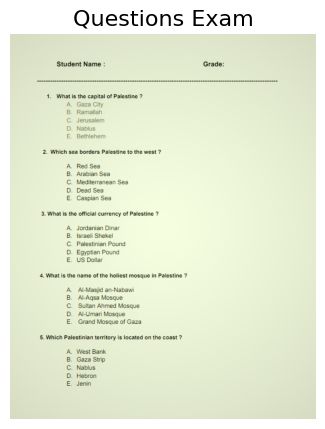

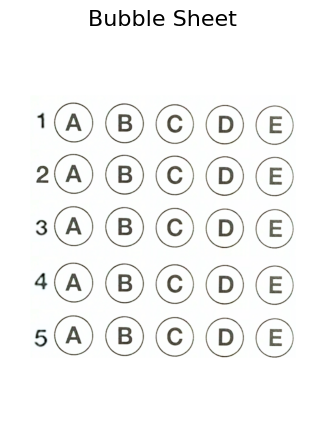

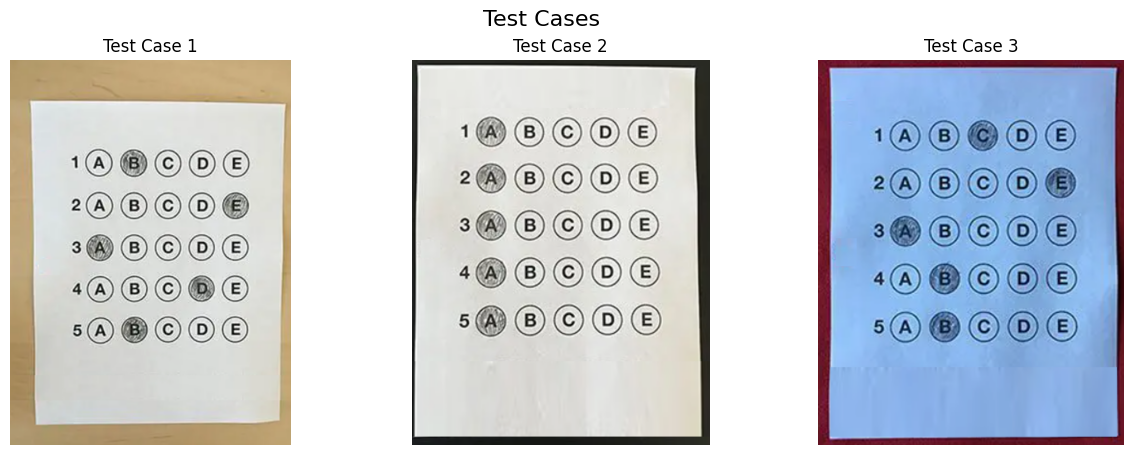

In [ ]:
# Convert images from BGR to RGB (Matplotlib expects RGB format)
question_img = cv2.cvtColor(cv2.imread("/content/drive/MyDrive/projects/DIP/Questiones.png")  , cv2.COLOR_BGR2RGB)
bubbleSheet= cv2.cvtColor(cv2.imread("/content/drive/MyDrive/projects/DIP/BubbleSheet.png"), cv2.COLOR_BGR2RGB)
test_case_1 = cv2.cvtColor(cv2.imread("/content/drive/MyDrive/projects/DIP/test1.png") , cv2.COLOR_BGR2RGB)
test_case_2 = cv2.cvtColor(cv2.imread("/content/drive/MyDrive/projects/DIP/test2.png") , cv2.COLOR_BGR2RGB)
test_case_3 = cv2.cvtColor(cv2.imread("/content/drive/MyDrive/projects/DIP/test3.png") , cv2.COLOR_BGR2RGB)

# Display "Questions Exam" image
plt.figure(figsize=(5, 5))
plt.imshow(question_img)
plt.title("Questions Exam", fontsize=16)
plt.axis("off")
plt.show()

# Display "Bubble Sheet" image
plt.figure(figsize=(5, 5))
plt.imshow(bubbleSheet)
plt.title("Bubble Sheet", fontsize=16)
plt.axis("off")
plt.show()

# Display "Test Cases" images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(test_case_1)
axes[0].set_title("Test Case 1")
axes[0].axis("off")

axes[1].imshow(test_case_2)
axes[1].set_title("Test Case 2")
axes[1].axis("off")

axes[2].imshow(test_case_3)
axes[2].set_title("Test Case 3")
axes[2].axis("off")

plt.suptitle("Test Cases", fontsize=16)
plt.show()


##**`▶ Extract Text from Image Using Tesseract OCR(Optical Character Recognition)`**

In [ ]:
Questions_path='/content/drive/MyDrive/projects/DIP/Questiones.png'
image = Image.open(Questions_path)
# Extract text from the Questions image
text = pytesseract.image_to_string(image)
print(text)

4. What is the capital of Palestine ?
Gaza City

Ramallah

Jerusalem

Nablus

Bethlehem

moomp>

2. Which sea borders Palestine to the west ?

A. Red Sea
B. Arabian Sea
C. Mediterranean Sea
D. Dead Sea
E. Caspian Sea
3. What is the official currency of Palestine ?

A. Jordanian Dinar
B. Israeli Shekel

C. Palestinian Pound
D. Egyptian Pound
E. US Dollar

‘4. What is the name of the holiest mosque in Palestine ?

A. AbMasid an-Nabawi
B. ALAgsa Mosque
©. Sultan Ahmed Mosque
D. Al-Umari Mosque
E. Grand Mosque of Gaza

‘5. Which Palestinian territory is located on the coast ?

A. West Bank
B. Gaza Strip
C. Nablus
D. Hebron
E. Jenin

In [ ]:
# Regular expression pattern to capture the question
pattern = r'\b\d+[.,]?\s*([^\?]+?\?)'

# Find and extract all matching questions
questions = re.findall(pattern, text)

for idx, question in enumerate(questions, 1):
    print(f"{idx}. {question}")

1. What is the capital of Palestine ?

2. Which sea borders Palestine to the west ?

3. What is the official currency of Palestine ?

4. What is the name of the holiest mosque in Palestine ?

5. Which Palestinian territory is located on the coast ?

##**`▶ Display Questions and Grade Results with Table Formatting and Feedback`**

In [ ]:
# Initialize the rich console
console = Console()

def display_questions_in_table(questions, grade_value, userAnswers, Correction):
    data = {
        'Question Number': [str(i + 1) for i in range(len(questions))],
        'Question Text': questions,
        'User Answers': userAnswers,
        'Correction': Correction
    }

    df = pd.DataFrame(data)

    # Create the output for the questions
    table_output = tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False, colalign=['center', 'left', 'center', 'center'])

    # The header
    console.print(f"[bold blue]{table_output.splitlines()[0]}[/bold blue]")

    # The body of the table
    for line in table_output.splitlines()[1:]:
        console.print(f"{line}")
    grade_data = [['Grade:', grade_value]]
    grade_output = tabulate(grade_data, tablefmt='fancy_grid', showindex=False, headers=[])
    console.print(f"[bold blue]{grade_output.splitlines()[0]}[/bold blue]")

    for line in grade_output.splitlines()[1:]:
        console.print(f"{line}")

    # Display the recommendation message based on grade
    if grade_value >= 70:
        recommendation = "[bold green]Excellent! Keep up the good work![/bold green]"
    elif 50 <= grade_value < 70:
        recommendation = "[bold yellow]Good job! Keep practicing to improve your score.[/bold yellow]"
    else:
        recommendation = "[bold red]Needs improvement. Consider seeking help or focus more on your studies.[/bold red]"
    console.print("\n[italic]Note :[/italic] " + recommendation)


##**`▶ Optical Mark Recognition (OMR) for Automated Answer Evaluation `**


1.   **Define Answer Key :**
      - dictionary stores the correct answer for each question (indexed by question number).
2.   **Read and Process the Image :**
      - loade the image
      -  convert to grayscale
      - reduce noise by Gaussian blur
      - find edges by Canny edge detection
3. **Contour Detection and Document Extraction :**
     - Find the document contour and apply a perspective transformation to correct the orientation
4. **Thresholding and Contour Detection for Answer Choices**
   - Threshold the image to highlight marked answers, then detect contours corresponding to answer choices.
5. **Detect and Evaluate Answers:**
  - For each question, detect the bubbled answer by counting pixels, compare it with the correct answer from ANSWER_KEY, and mark it correct or incorrect.
7. **Final Output :**
   - The final score is displayed on the image to the user.
   - The function returns the score, a list of lettered answers, and a list indicating whether each answer is correct.




In [ ]:
# Answer key for the questions sample
ANSWER_KEY = {
    0: 1,
    1: 4,
    2: 0,
    3: 3,
    4: 1
}

# Mapping from numeric answers to letters
ANSWER_MAPPING = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}

def extract_user_answers_from_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 75, 200)

    # Find contours in edge-detected image
    cnts = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    docCnt = None

    # Draw all contours
    allContourImage = image.copy()
    cv2.drawContours(allContourImage, cnts, -1, (0, 0, 255), 3)

    # Find the document contour
    if len(cnts) > 0:
        cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
        for c in cnts:
            peri = cv2.arcLength(c, closed=True)
            approx = cv2.approxPolyDP(c, epsilon=peri * 0.02, closed=True)
            if len(approx) == 4:
                docCnt = approx
                break

    # Perspective transformation
    paper = four_point_transform(image, docCnt.reshape(4, 2))
    warped = four_point_transform(gray, docCnt.reshape(4, 2))

    # Threshold the warped image
    thresh = cv2.threshold(warped, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # Find contours in the thresholded image
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    questionCnts = []

    # Filter contours for the questions
    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        ar = w / float(h)
        if w >= 20 and h >= 20 and 0.9 <= ar <= 1.1:
            questionCnts.append(c)

    # Sort the question contours top-to-bottom
    questionCnts = imutils.contours.sort_contours(questionCnts, method="top-to-bottom")[0]

    # Lists to store the results
    user_answers = []
    correctness = []
    correct = 0

    # Evaluate the answers
    for (q, i) in enumerate(np.arange(0, len(questionCnts), 5)):
        cnts = imutils.contours.sort_contours(questionCnts[i: i + 5])[0]
        bubbled = None

        for (j, c) in enumerate(cnts):
            mask = np.zeros(thresh.shape, dtype="uint8")
            cv2.drawContours(mask, [c], -1, 255, -1)

            mask = cv2.bitwise_and(thresh, thresh, mask=mask)
            total = cv2.countNonZero(mask)

            if bubbled is None or total > bubbled[0]:
                bubbled = (total, j)

        user_answers.append(bubbled[1])

        # Check correctness
        correct_answer = ANSWER_KEY[q]
        is_correct = (bubbled[1] == correct_answer)
        correctness.append(is_correct)

        color = (0, 255, 0) if is_correct else (0, 0, 255)
        if is_correct:
            correct += 1

        cv2.drawContours(paper, [cnts[correct_answer]], -1, color, 3)

    # Convert numeric answers to letter answers
    letter_answers = [ANSWER_MAPPING[answer] for answer in user_answers]

    # Calculate score
    score = (correct / len(ANSWER_KEY)) * 100

    # Show final result
    cv2.putText(paper, f"{score:.2f}%", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
    # Display the final result image
    cv2_imshow(paper)
    return score, letter_answers, correctness


##**`Test case 1 (full mark)`**

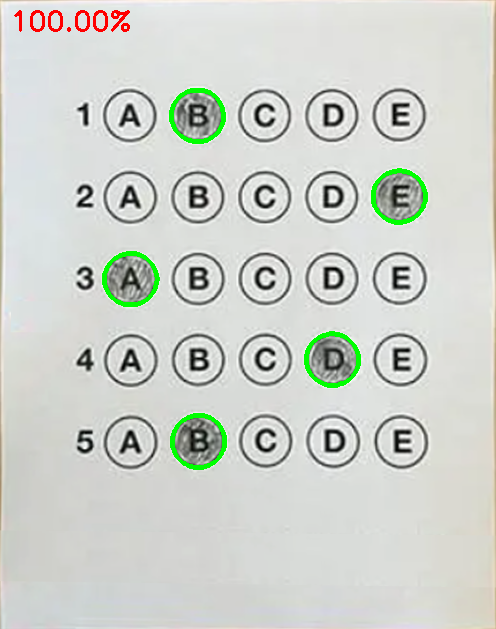

╒═══════════════════╤═══════════════════════════════════════════════════════╤════════════════╤══════════════╕

│  Question Number  │ Question Text                                         │  User Answers  │  Correction  │

╞═══════════════════╪═══════════════════════════════════════════════════════╪════════════════╪══════════════╡

│         1         │ What is the capital of Palestine ?                    │       B        │     True     │

├───────────────────┼───────────────────────────────────────────────────────┼────────────────┼──────────────┤

│         2         │ Which sea borders Palestine to the west ?             │       E        │     True     │

├───────────────────┼───────────────────────────────────────────────────────┼────────────────┼──────────────┤

│         3         │ What is the official currency of Palestine ?          │       A        │     True     │

├───────────────────┼───────────────────────────────────────────────────────┼────────────────┼──────────────┤

│         4         │ What is the name of the holiest mosque in Palestine ? │       D        │     True     │

├───────────────────┼───────────────────────────────────────────────────────┼────────────────┼──────────────┤

│         5         │ Which Palestinian territory is located on the coast ? │       B        │     True     │

╘═══════════════════╧═══════════════════════════════════════════════════════╧════════════════╧══════════════╛

╒════════╤═════╕

│ Grade: │ 100 │

╘════════╧═════╛

Note : Excellent! Keep up the good work!

In [ ]:
# Test case 1
image_path1 = "/content/drive/MyDrive/projects/DIP/test1.png"
score1, user_answers1, correctness1 = extract_user_answers_from_image(image_path1)
tableAnswers1=display_questions_in_table(questions, score1 , user_answers1,correctness1)
tableAnswers1

##**`Test case 2 (low mark)`**

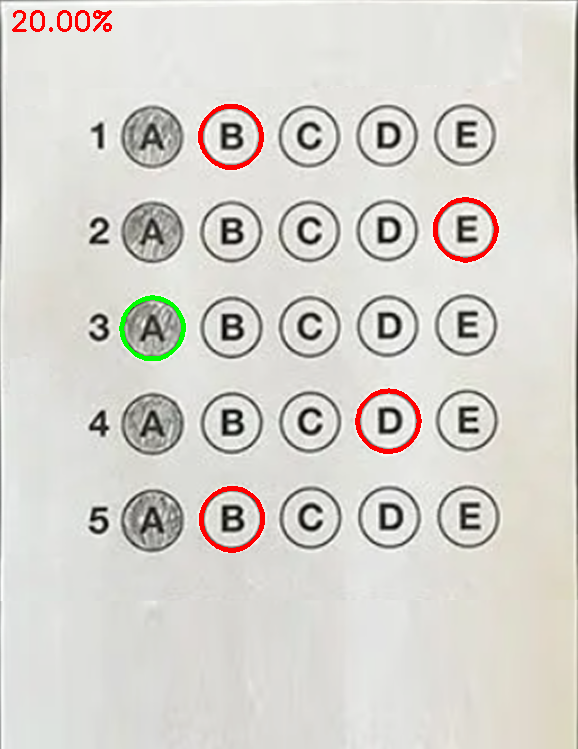

╒═══════════════════╤═══════════════════════════════════════════════════════╤════════════════╤══════════════╕

│  Question Number  │ Question Text                                         │  User Answers  │  Correction  │

╞═══════════════════╪═══════════════════════════════════════════════════════╪════════════════╪══════════════╡

│         1         │ What is the capital of Palestine ?                    │       A        │    False     │

├───────────────────┼───────────────────────────────────────────────────────┼────────────────┼──────────────┤

│         2         │ Which sea borders Palestine to the west ?             │       A        │    False     │

├───────────────────┼───────────────────────────────────────────────────────┼────────────────┼──────────────┤

│         3         │ What is the official currency of Palestine ?          │       A        │     True     │

├───────────────────┼───────────────────────────────────────────────────────┼────────────────┼──────────────┤

│         4         │ What is the name of the holiest mosque in Palestine ? │       A        │    False     │

├───────────────────┼───────────────────────────────────────────────────────┼────────────────┼──────────────┤

│         5         │ Which Palestinian territory is located on the coast ? │       A        │    False     │

╘═══════════════════╧═══════════════════════════════════════════════════════╧════════════════╧══════════════╛

╒════════╤════╕

│ Grade: │ 20 │

╘════════╧════╛

Note : Needs improvement. Consider seeking help or focus more on your studies.

In [ ]:
# Test case 2
image_path2 = "/content/drive/MyDrive/projects/DIP/test2.png"
score2, user_answers2, correctness2 = extract_user_answers_from_image(image_path2)
tableAnswers2=display_questions_in_table(questions, score2 , user_answers2,correctness2)
tableAnswers2

##**`Test case 3 (intermediate mark)`**

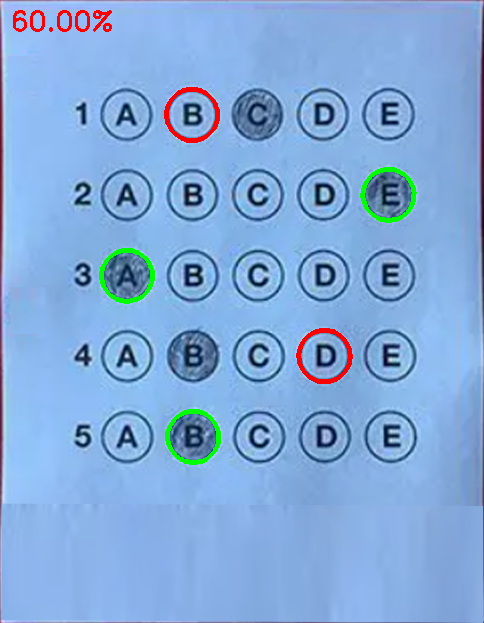

╒═══════════════════╤═══════════════════════════════════════════════════════╤════════════════╤══════════════╕

│  Question Number  │ Question Text                                         │  User Answers  │  Correction  │

╞═══════════════════╪═══════════════════════════════════════════════════════╪════════════════╪══════════════╡

│         1         │ What is the capital of Palestine ?                    │       C        │    False     │

├───────────────────┼───────────────────────────────────────────────────────┼────────────────┼──────────────┤

│         2         │ Which sea borders Palestine to the west ?             │       E        │     True     │

├───────────────────┼───────────────────────────────────────────────────────┼────────────────┼──────────────┤

│         3         │ What is the official currency of Palestine ?          │       A        │     True     │

├───────────────────┼───────────────────────────────────────────────────────┼────────────────┼──────────────┤

│         4         │ What is the name of the holiest mosque in Palestine ? │       B        │    False     │

├───────────────────┼───────────────────────────────────────────────────────┼────────────────┼──────────────┤

│         5         │ Which Palestinian territory is located on the coast ? │       B        │     True     │

╘═══════════════════╧═══════════════════════════════════════════════════════╧════════════════╧══════════════╛

╒════════╤════╕

│ Grade: │ 60 │

╘════════╧════╛

Note : Good job! Keep practicing to improve your score.

In [ ]:
# Test case 3
image_path3 = "/content/drive/MyDrive/projects/DIP/test3.png"
score3, user_answers3, correctness3 = extract_user_answers_from_image(image_path3)
tableAnswers3=display_questions_in_table(questions, score3 , user_answers3,correctness3)
tableAnswers3


### ================================== *`Thank you !`*==================================